# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Get test and train data

In [4]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.0, 0.2)

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


C:\Users\SchnitM5\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


# Model without tuning

## Create and train the model

In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier()

# Evaluation

## Prediction

In [7]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)
y_proba = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.736933666137206

Precision Score:
0.7577026121902211

Recall Score:
0.6902074435631482

F1-Score:
0.7223818646232438

Cost:
5509



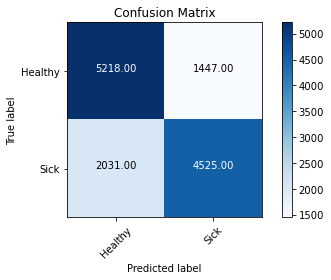

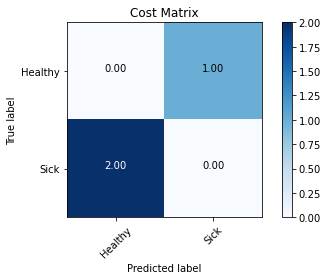

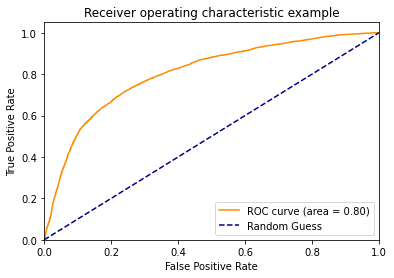


ROC Score:
0.8031885373722931


In [8]:
show_evaluation(y_test, y_pred, y_proba)

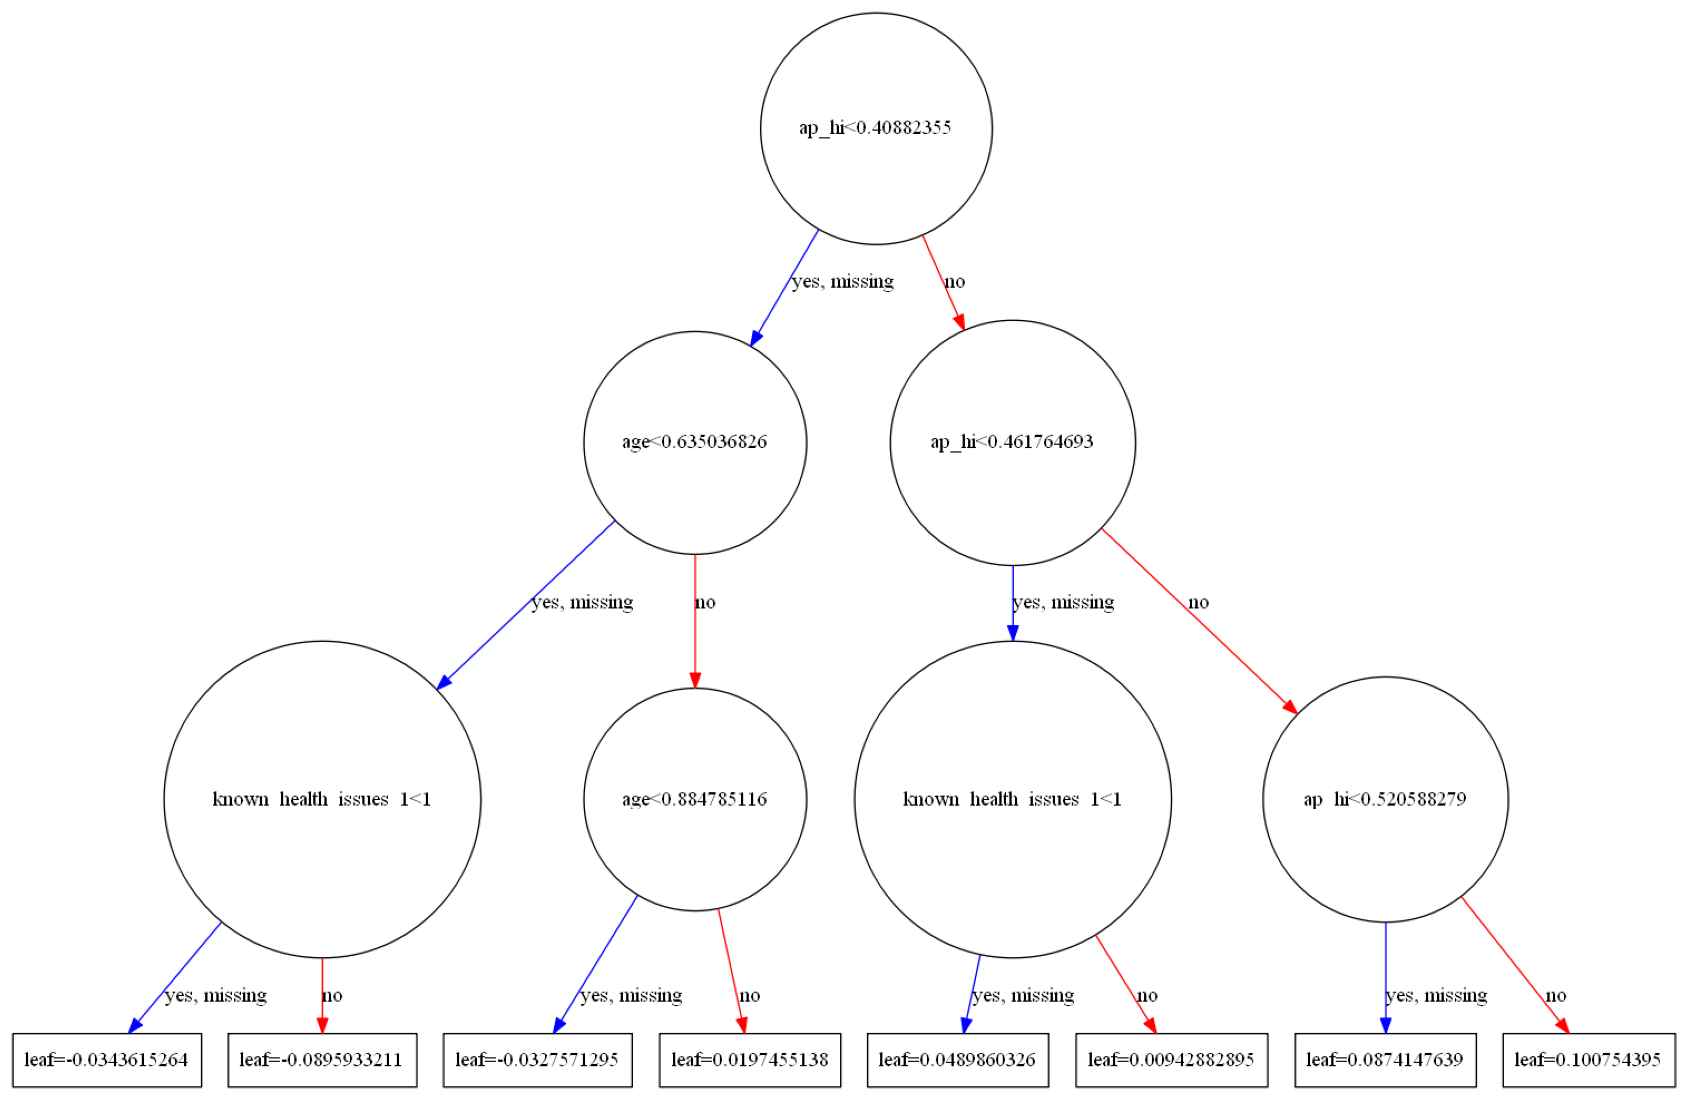

In [9]:
from graphviz import Digraph
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model, num_trees=4, ax=ax)
plt.show()

## Most important variables

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

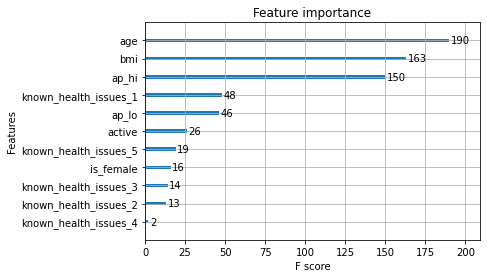

In [10]:
xgb.plot_importance(model)


# Model(s) with tuning

### Tune max_depth and min_child_weight

In [11]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 4.8093976 ,  4.17302847,  5.20743184, 11.14999719,  8.72719693,
         10.21899524,  9.72399788,  8.69339623,  8.31699529, 11.36459703,
         10.76379766,  9.5335968 ]),
  'std_fit_time': array([0.36674431, 0.1534814 , 0.70499301, 0.86674345, 0.77336415,
         0.71947295, 1.44024499, 0.19892984, 0.08805564, 0.15683917,
         0.10197872, 1.10141387]),
  'mean_score_time': array([0.05880094, 0.06880331, 0.08900051, 0.10080557, 0.08600082,
         0.08380122, 0.07940083, 0.07360244, 0.07700119, 0.09000244,
         0.08760262, 0.07980094]),
  'std_score_time': array([0.00435305, 0.01828127, 0.02304038, 0.02022441, 0.01082367,
         0.02486195, 0.00492351, 0.00393037, 0.00878674, 0.00540413,
         0.00307182, 0.01045715]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [12]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2.fit(x_train,y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([3.00379839, 2.96339655, 3.05699658, 4.20179915, 3.98279552,
         4.08239694, 5.00919533, 4.93519692, 4.23579741]),
  'std_fit_time': array([0.04001927, 0.02755274, 0.03104316, 0.03235131, 0.08099823,
         0.06895542, 0.07021647, 0.03168223, 0.95276486]),
  'mean_score_time': array([0.04980278, 0.05260181, 0.04920063, 0.05119972, 0.05340395,
         0.05640059, 0.06060371, 0.0558033 , 0.05820084]),
  'std_score_time': array([0.00453506, 0.00801819, 0.00584849, 0.00453233, 0.00196138,
         0.00508315, 0.00686124, 0.00577414, 0.01223803]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         

In [13]:
param_test2b = {
 'max_depth':[2,3,4],
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,cv=5)
gsearch2b.fit(x_train,y_train)
gsearch2b.cv_results_, gsearch2b.best_params_, gsearch2b.best_score_

({'mean_fit_time': array([2.97339725, 3.12199798, 3.22739758, 3.17399764, 3.99839959,
         4.13659186, 4.11839204, 4.06259713, 5.02019682, 4.91259656,
         4.93479676, 4.86239681]),
  'std_fit_time': array([0.04816005, 0.0582004 , 0.02366874, 0.03549585, 0.03715099,
         0.07381461, 0.13933808, 0.06129148, 0.04192149, 0.03686666,
         0.03190242, 0.08253652]),
  'mean_score_time': array([0.05160246, 0.05280218, 0.04400635, 0.04860272, 0.05260239,
         0.04840322, 0.05080204, 0.05000377, 0.05680318, 0.05880165,
         0.05480242, 0.0594017 ]),
  'std_score_time': array([0.00557256, 0.00910978, 0.0045227 , 0.005535  , 0.00293889,
         0.00215244, 0.00343046, 0.00477239, 0.00727746, 0.00667604,
         0.00453364, 0.01380608]),
  'param_max_depth': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

### Tune gamma

In [14]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch3.fit(x_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([5.04299927, 5.09679508, 5.8529984 , 6.57759814, 5.88479924]),
  'std_fit_time': array([0.04939462, 0.06295552, 0.52540873, 0.12848027, 1.39354071]),
  'mean_score_time': array([0.08000007, 0.06040277, 0.07880211, 0.06080027, 0.06960206]),
  'std_score_time': array([0.02117451, 0.00531342, 0.0111981 , 0.0141195 , 0.00763119]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.79597779, 0.79597861, 0.79607362, 0.79594995, 0.79583828]),
  'split1_test_score': array([0.79222443, 0.79222293, 0.79228379, 0.79230318, 0.79223998]),
  'split2_test_score': array([0.79910785, 0.79874304, 0.79873425, 0.79881119, 0.79874049]),
  'split3_test_score': array([0.79173894, 0.79174434, 0.7917683 , 0.79164757, 0.79175845]),

### Recheck model

In [15]:
model1 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

model1.fit(x_train,y_train)


y_prob1 = model1.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = model.predict_proba(x_test)[:,1]

Accuracy Score:
0.7365554799183118

Precision Score:
0.7536734356942381

Recall Score:
0.6963087248322147

F1-Score:
0.7238563386981685

Cost:
5474



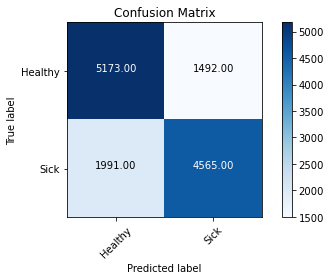

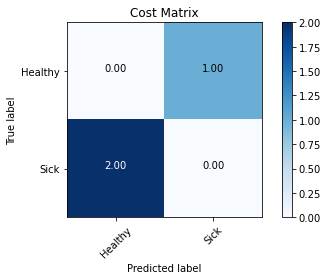

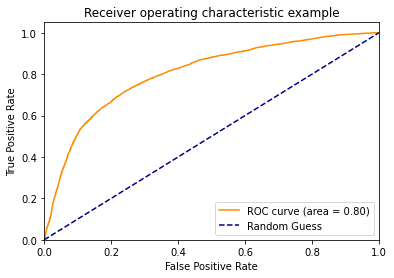


ROC Score:
0.8031885373722931


In [16]:
show_evaluation(y_test, y_pred1, y_proba1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

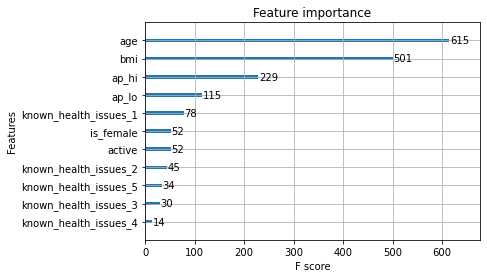

In [17]:
xgb.plot_importance(model1)

### Tune subsample and colsample_bytree

In [18]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}  
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch4.fit(x_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 4.82519498,  4.64480519,  5.20660782,  5.47400222,  5.79519691,
          6.46799846,  8.72399826,  8.79659767,  7.78099713,  5.71899381,
          6.03139467,  6.15479417,  8.5497045 , 10.82251267,  8.18039737,
          6.92459555]),
  'std_fit_time': array([0.07044772, 0.02097353, 0.46122556, 0.0336492 , 0.18291696,
         0.49272075, 1.01925331, 0.22949809, 0.97485888, 0.14271156,
         0.41431442, 0.10689408, 1.45728431, 0.68121662, 1.40030063,
         0.06128464]),
  'mean_score_time': array([0.06419926, 0.06860394, 0.0768043 , 0.0806004 , 0.06700225,
         0.07940507, 0.07720394, 0.08320336, 0.06679978, 0.0656024 ,
         0.07240367, 0.07000155, 0.06760125, 0.09280219, 0.08320484,
         0.07440162]),
  'std_score_time': array([0.01062841, 0.01227356, 0.00584663, 0.00716967, 0.01115704,
         0.01982565, 0.01209025, 0.02091089, 0.01151617, 0.00868634,
         0.00703135, 0.01676982, 0.0098722 , 0.01255752, 0.01747529,
         0.010613

In [19]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([ 7.88579345, 15.72733068, 28.38721209, 22.64060507, 10.54157777,
          9.60879402,  9.50114727, 14.43819399, 10.78447871]),
  'std_fit_time': array([0.13377261, 9.4815261 , 0.95597922, 3.40268486, 0.80072729,
         1.38472698, 0.93910567, 2.00011246, 2.75761768]),
  'mean_score_time': array([0.10320086, 0.08001642, 0.15967493, 0.10484405, 0.14306073,
         0.08203573, 0.08523841, 0.07883387, 0.10024495]),
  'std_score_time': array([0.04973084, 0.01201209, 0.05635904, 0.04614695, 0.08475094,
         0.00976251, 0.01373621, 0.00778592, 0.02470299]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, Fa

### Tune regularization parameters

In [20]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,cv=5)
gsearch6.fit(x_train,y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([6.74079714, 7.39886937, 7.44248719, 9.39009681, 7.18365278]),
  'std_fit_time': array([0.19820812, 0.44481744, 0.37945395, 0.99425959, 1.70227163]),
  'mean_score_time': array([0.08764005, 0.07944036, 0.06542997, 0.08163948, 0.06702957]),
  'std_score_time': array([0.00920385, 0.01816867, 0.00634293, 0.01341997, 0.01077712]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.79598659, 0.79577173, 0.79574882, 0.79579789, 0.79323763]),
  'split1_test_score': array([0.79236084, 0.79238924, 0.7926414 , 0.79309508, 0.78963041]),
  'split2_test_score': array([0.79902183, 0.79905836, 0.79870497, 0.799018  , 0.79559909]),
  'split3_test_score': array([0.79283198, 0.79280045, 0.79236085,

In [21]:
param_test7 = {
 'reg_alpha':[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,cv=5)
gsearch7.fit(x_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([13.09683852,  9.50755138,  7.22319865,  6.08212976,  5.75778909,
          5.82542734,  4.98668056]),
  'std_fit_time': array([1.50689965, 0.74883297, 0.93198898, 0.19305846, 0.1802552 ,
         0.36704723, 0.36964494]),
  'mean_score_time': array([0.08923745, 0.09283748, 0.07143183, 0.07983246, 0.07103324,
         0.06382909, 0.06102705]),
  'std_score_time': array([0.01911833, 0.02310647, 0.01108181, 0.01307882, 0.01158213,
         0.01130922, 0.009425  ]),
  'param_reg_alpha': masked_array(data=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 0.75},
   {'reg_alpha': 1},
   {'reg_alpha': 1.25},
   {'reg_alpha': 1.5},
   {'reg_alpha': 1.75},
   {'reg_alpha': 2}],
  'split0_test_score': array([0.79595358, 0.79582775, 0.79579789, 0.79554775, 0.7960495 ,
         0.79625885, 0.79602725]),
  'split1_t

### Recheck model

In [22]:
model2 = XGBClassifier( 
    learning_rate=0.1, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=8, 
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.7,
    reg_alpha=1.75,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model2.fit(x_train,y_train)


y_prob2 = model2.predict(x_test.astype('float32'))
y_pred2 = np.round(y_prob2)
y_proba2 = model2.predict_proba(x_test)[:,1]

Accuracy Score:
0.7367067544058694

Precision Score:
0.7535037098103875

Recall Score:
0.6970713849908481

F1-Score:
0.7241898423262816

Cost:
5467



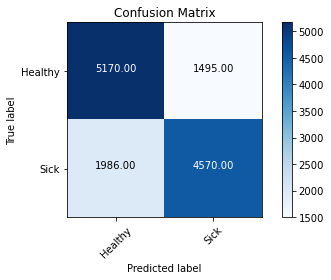

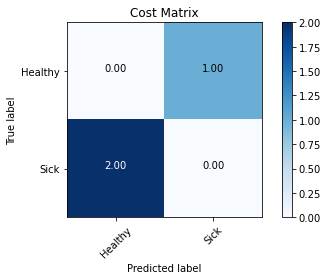

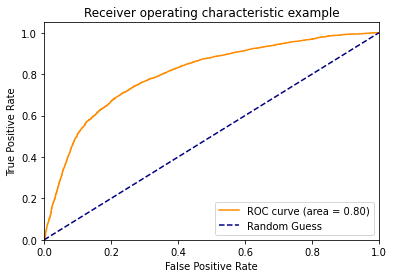


ROC Score:
0.802761687981483


In [23]:
show_evaluation(y_test, y_pred2, y_proba2)

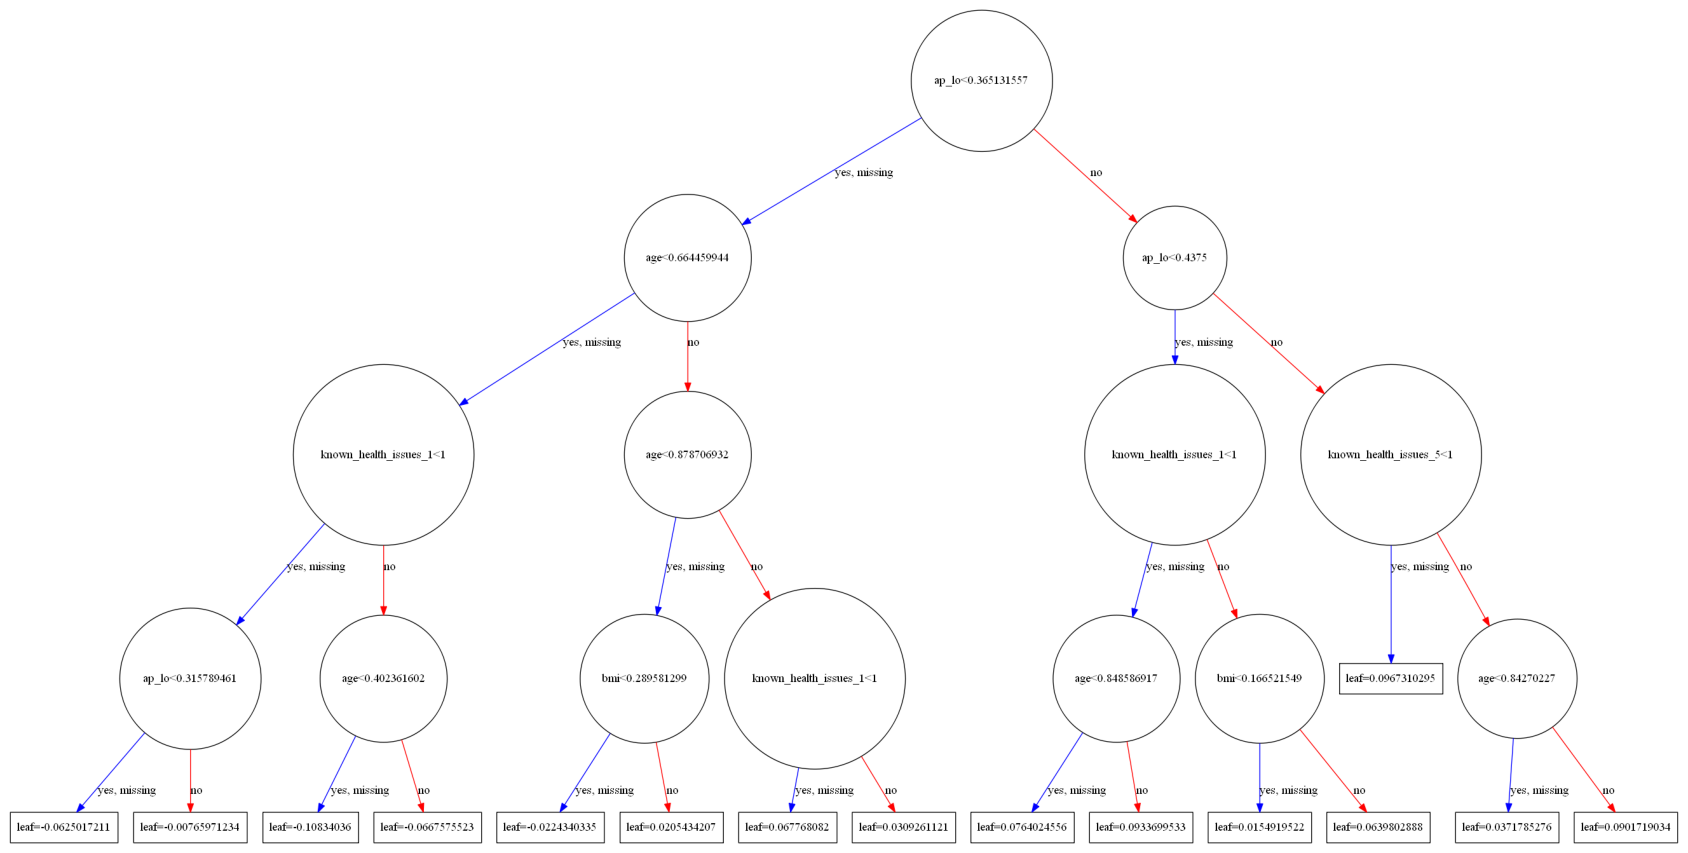

In [24]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(model2, num_trees=4, ax=ax)
plt.show()

### Change learning rate

In [25]:
model3 = XGBClassifier( 
    learning_rate=0.02, 
    n_estimators=140, 
    max_depth=4,
    min_child_weight=8, 
    gamma=0.0, 
    subsample=0.8, 
    colsample_bytree=0.7,
    reg_alpha=1.75,
    objective= 'binary:logistic', 
    nthread=4, 
    scale_pos_weight=1,
    seed=27)

model3.fit(x_train,y_train)


y_prob3 = model3.predict(x_test.astype('float32'))
y_pred3 = np.round(y_prob3)
y_proba3 = model3.predict_proba(x_test)[:,1]

Accuracy Score:
0.7373118523561002

Precision Score:
0.762204456540228

Recall Score:
0.6834960341671751

F1-Score:
0.7207076799356654

Cost:
5548



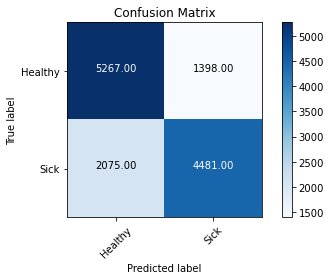

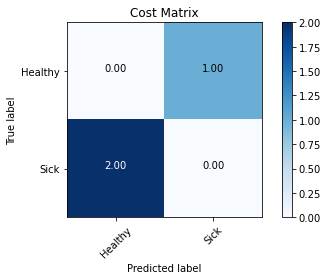

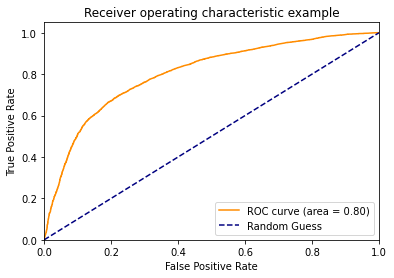


ROC Score:
0.8029834144014956


In [26]:
show_evaluation(y_test, y_pred3, y_proba3)

### Save predictions

In [27]:
# Save predictions
method_name = 'XGBoost'
predicted_probabilities = y_proba2
savePredictedProbabilities(method_name, y_test, predicted_probabilities)